In [1]:
# Import needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('segmented_customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Unnamed: 6,Unnamed: 7,Unnamed: 8,Cluster.1
0,1,Male,19,15,39,3,NaN,NaN,NaN,3.0
1,2,Male,21,15,81,4,NaN,NaN,NaN,4.0
2,3,Female,20,16,6,3,NaN,NaN,NaN,0.0
3,4,Female,23,16,77,4,NaN,NaN,NaN,1.0
4,5,Female,31,17,40,3,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,NaN,NaN,NaN,NaN
196,197,Female,45,126,28,2,NaN,NaN,NaN,NaN
197,198,Male,32,126,74,1,NaN,NaN,NaN,NaN
198,199,Male,32,137,18,2,NaN,NaN,NaN,NaN


In [10]:
df.shape

(200, 10)

In [12]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Cluster.1'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
 5   Cluster                 200 non-null    int64  
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Unnamed: 8              0 non-null      float64
 9   Cluster.1               5 non-null      float64
dtypes: float64(4), int64(5), object(1)
memory usage: 15.8+ KB


In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,Unnamed: 6,Unnamed: 7,Unnamed: 8,Cluster.1
count,200.000000,200.000000,200.000000,200.000000,200.000000,0.0,0.0,0.0,5.000000
mean,100.500000,38.850000,60.560000,50.200000,1.410000,NaN,NaN,NaN,2.000000
std,57.879185,13.969007,26.264721,25.823522,1.411332,NaN,NaN,NaN,1.581139
min,1.000000,18.000000,15.000000,1.000000,0.000000,NaN,NaN,NaN,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000,NaN,NaN,NaN,1.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000,NaN,NaN,NaN,2.000000
75%,150.250000,49.000000,78.000000,73.000000,2.000000,NaN,NaN,NaN,3.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000,NaN,NaN,NaN,4.000000


In [15]:
df.isnull().sum()

CustomerID                  0
Gender                      0
Age                         0
Annual Income (k$)          0
Spending Score (1-100)      0
Cluster                     0
Unnamed: 6                200
Unnamed: 7                200
Unnamed: 8                200
Cluster.1                 195
dtype: int64

In [ ]:
# drop multiple colunms by index
# df.drop(df.columns[[0,2,5]], axis=1, inplace=True) 

# drop multiple columns by name
# df.drop(['column_name1', 'column_name2'], axis=1, inplace=True)

In [17]:
df = pd.read_csv('segmented_customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Unnamed: 6,Unnamed: 7,Unnamed: 8,Cluster.1
0,1,Male,19,15,39,3,NaN,NaN,NaN,3.0
1,2,Male,21,15,81,4,NaN,NaN,NaN,4.0
2,3,Female,20,16,6,3,NaN,NaN,NaN,0.0
3,4,Female,23,16,77,4,NaN,NaN,NaN,1.0
4,5,Female,31,17,40,3,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,NaN,NaN,NaN,NaN
196,197,Female,45,126,28,2,NaN,NaN,NaN,NaN
197,198,Male,32,126,74,1,NaN,NaN,NaN,NaN
198,199,Male,32,137,18,2,NaN,NaN,NaN,NaN


In [18]:
df = pd.read_csv('segmented_customers.csv')
df.drop(['Cluster', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Cluster.1' ], axis=1, inplace=True)

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
df.shape

(200, 5)

In [20]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool>

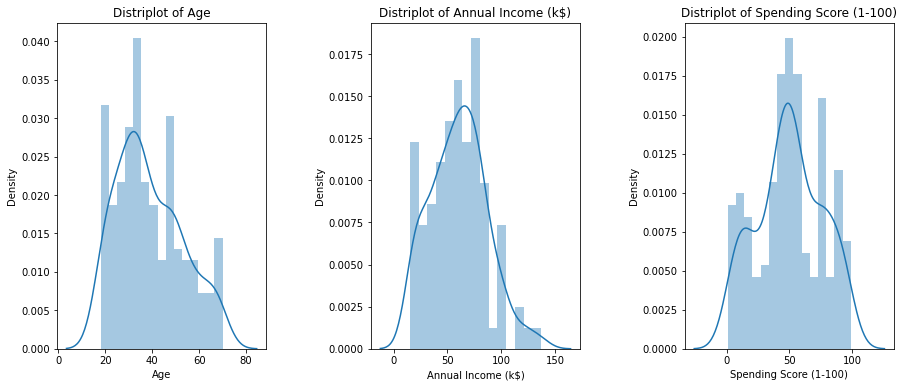

In [25]:
# we make our n = 0 because we are doing subplot (check out all the attributes it can take) it means we 
# are putting all on a single plot
# sns distributed plot is so that it can be in different plot . Distribution is like histogram; bins is like the height

plt.figure(1, figsize = (15,6))

n = 0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n +=1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 15)
    plt.title(f'Distriplot of {x}')
plt.show()

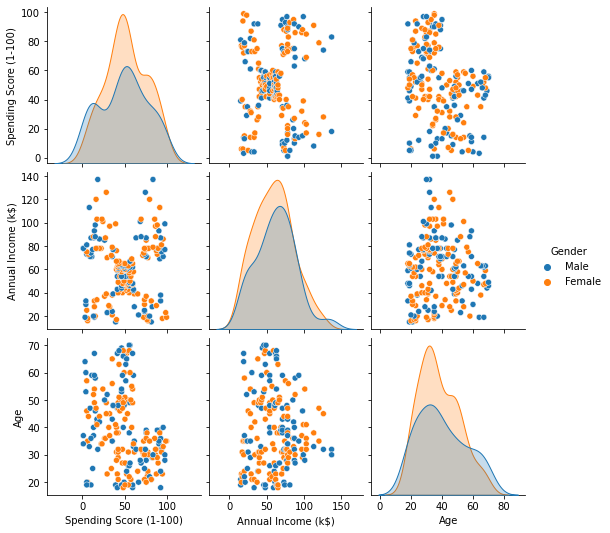

In [20]:
# hue in visualization ( Also visit w3schhol to learn seaborn) in hue we pick only variable that is object

sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age' ], hue = "Gender")

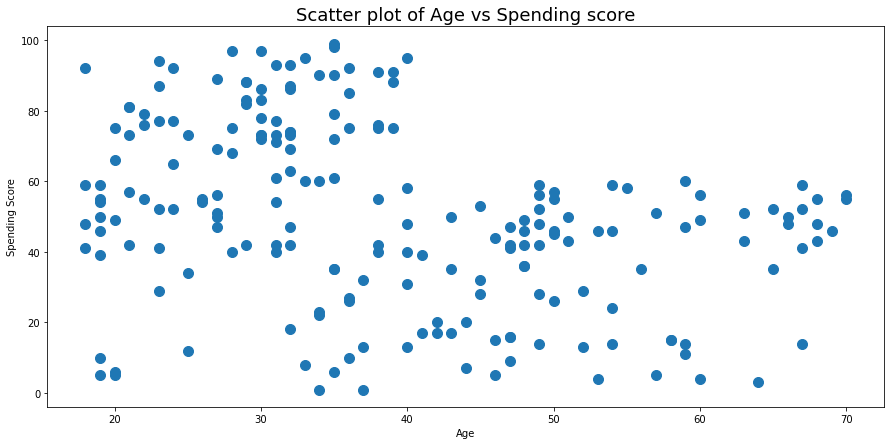

In [27]:
# figsize is how we size our shape

plt.figure(1, figsize = (15, 7))
plt.title('Scatter plot of Age vs Spending score', fontsize = 18)
plt.xlabel('Age')
plt.ylabel('Spending Score')
x = 'Age'
y = 'Spending Score (1-100)'
plt.scatter(x, y, data = df, s = 100)
plt.show()

In [28]:
# more than one column takes two angular brackets.
# we also need to it that algorithm to be able to find what we want, then append into score
# We want to get our K (we are going to get more than one k)

X1 = df[['Age', 'Spending Score (1-100)']].iloc[: , :].values
score = []
for i in range(1, 15):
    k_algorithm = (KMeans(n_clusters = i, init='k-means++', n_init= 10, max_iter = 300,
                         random_state = 111, algorithm= 'elkan'))
    
    k_algorithm.fit(X1)
    score.append(k_algorithm.inertia_)

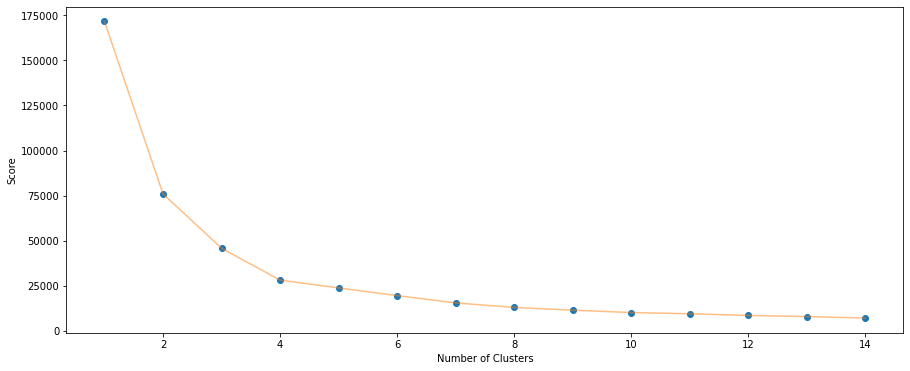

In [29]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1,15), score, 'o')
plt.plot(np.arange(1, 15), score, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

### Applying KMeans for K =4

In [30]:
k_algorithm = (KMeans(n_clusters = 4, init='k-means++', n_init= 10, max_iter = 300,
                         random_state = 111, algorithm= 'elkan'))
    
k_algorithm.fit(X1)
labels1 = k_algorithm.labels_
centroids1 = k_algorithm.cluster_centers_

In [31]:
# we want to look at x min and x maximum in our visualization. 
# The values are positionalfirst one take care of x_min and the next x_max (we want to find min and max in Xvalues)

h = 0.02
x_min, x_max = X1[:, 0].min()-1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min()-1, X1[:, 0].max() + 1

# to use mesh which we normally find in our numpy (h here stands for differences btw min and max)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = k_algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

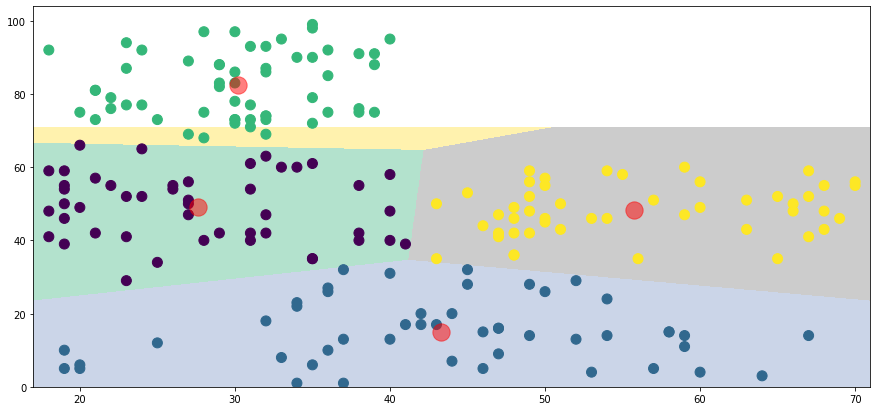

In [32]:
# We are trying to show it as an image here. A;so, all this plot we have done we want to put the plot and segment it for us

plt.figure(1, figsize = (15,7))
plt.clf()

Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, 
           aspect = 'auto', origin = 'lower')

plt.scatter(x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 1], s = 300, c ='red', alpha = 0.5)
# plt.ylabel(f'Spending Score (1-100)'), plt.xlabel('Age')

plt.show()

In [33]:
k_algorithm = (KMeans(n_clusters = 5, init='k-means++', n_init= 10, max_iter = 300,
                         random_state = 111, algorithm= 'elkan'))
    
k_algorithm.fit(X1)
labels1 = k_algorithm.labels_
centroids1 = k_algorithm.cluster_centers_

In [34]:
h = 0.02
x_min, x_max = X1[:, 0].min()-1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min()-1, X1[:, 0].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = k_algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

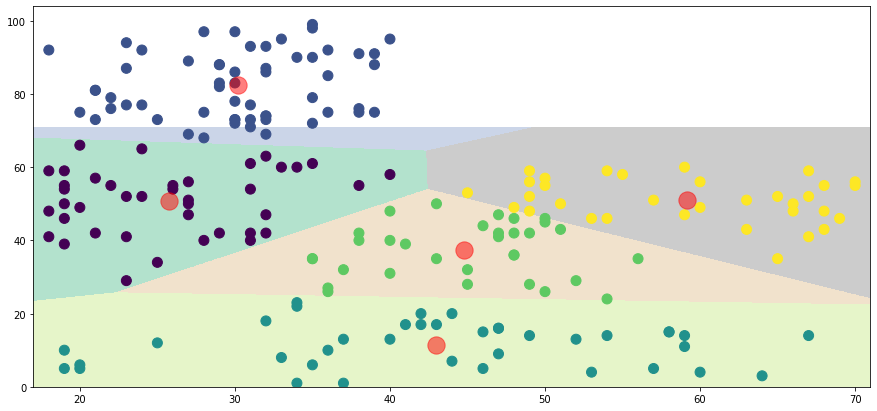

In [35]:
plt.figure(1, figsize = (15,7))
plt.clf()

Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, 
           aspect = 'auto', origin = 'lower')

plt.scatter(x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 1], s = 300, c ='red', alpha = 0.5)
# plt.ylabel(f'Spending Score (1-100)'), plt.xlabel('Age')

plt.show()

In [36]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

score = []
for i in range(1, 11):
    k_algorithm = (KMeans(n_clusters = i, init='k-means++', n_init= 10, max_iter = 300,
                         random_state = 111, algorithm= 'elkan'))
    
    k_algorithm.fit(X2)
    score.append(k_algorithm.inertia_)

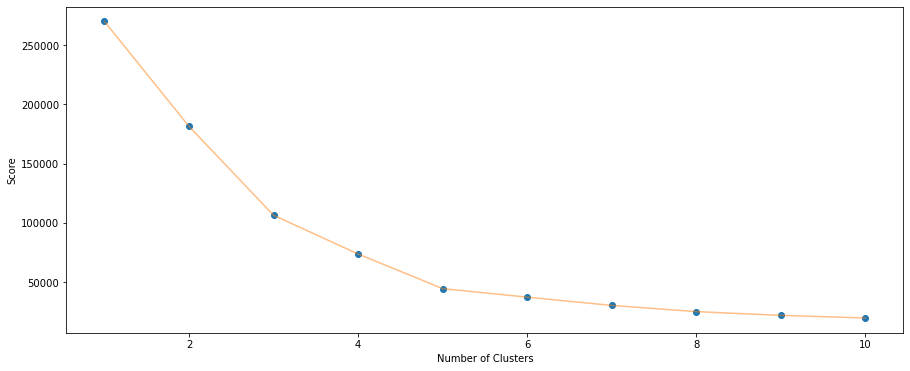

In [38]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1,11), score, 'o')
plt.plot(np.arange(1, 11), score, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [39]:
k_algorithm = (KMeans(n_clusters = 5, init='k-means++', n_init= 10, max_iter = 300,
                         random_state = 111, algorithm= 'elkan'))
    
k_algorithm.fit(X2)
labels2 = k_algorithm.labels_
centroids2 = k_algorithm.cluster_centers_

In [40]:
h = 0.02
x_min, x_max = X2[:, 0].min()-1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min()-1, X2[:, 0].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = k_algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

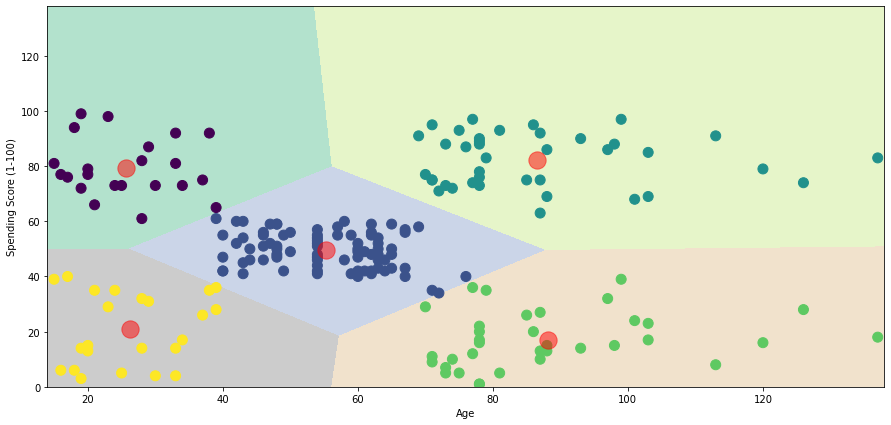

In [41]:
plt.figure(1, figsize = (15,7))
plt.clf()

Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, 
           aspect = 'auto', origin = 'lower')

plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, c = labels2, s = 100)
plt.scatter(x = centroids2[:, 0], y = centroids2[:, 1], s = 300, c ='red', alpha = 0.5) 
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')

plt.show()

In [42]:
k_algorithm = (KMeans(n_clusters = 6, init='k-means++', n_init= 10, max_iter = 300,
                         random_state = 111, algorithm= 'elkan'))
    
k_algorithm.fit(X2)
labels2 = k_algorithm.labels_
centroids2 = k_algorithm.cluster_centers_

In [43]:
h = 0.02
x_min, x_max = X2[:, 0].min()-1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min()-1, X2[:, 0].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = k_algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

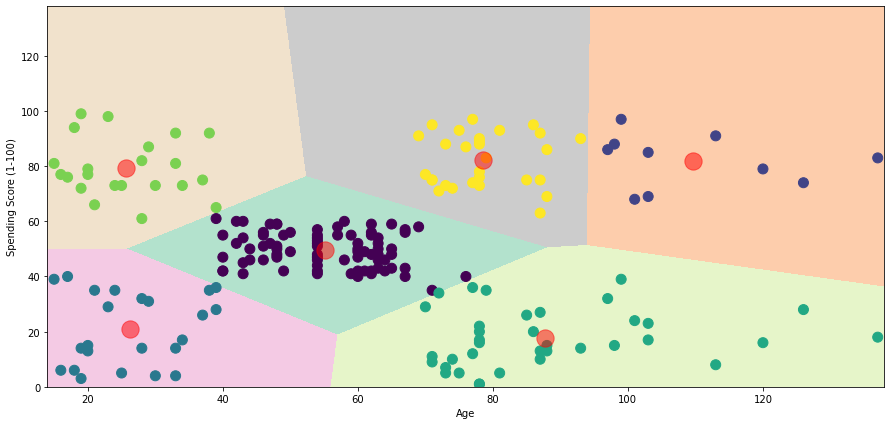

In [44]:
plt.figure(1, figsize = (15,7))
plt.clf()

Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, 
           aspect = 'auto', origin = 'lower')

plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, c = labels2, s = 100)
plt.scatter(x = centroids2[:, 0], y = centroids2[:, 1], s = 300, c ='red', alpha = 0.5) 
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')

plt.show()

In [45]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

score = []
for i in range(1, 11):
    k_algorithm = (KMeans(n_clusters = i, init='k-means++', n_init= 10, max_iter = 300,
                         random_state = 111, algorithm= 'elkan'))
    
    k_algorithm.fit(X3)
    score.append(k_algorithm.inertia_)

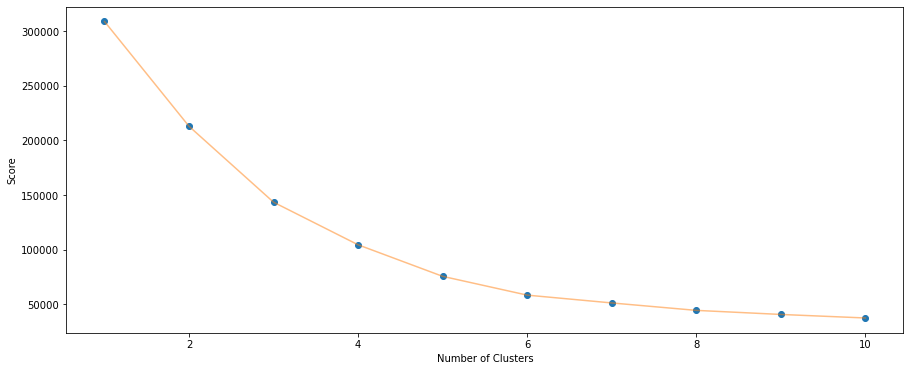

In [47]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1,11), score, 'o')
plt.plot(np.arange(1, 11), score, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [63]:
 k_algorithm = (KMeans(n_clusters = 6, init='k-means++', n_init= 10, max_iter = 300,
                         random_state = 111, algorithm= 'elkan'))
    
k_algorithm.fit(X3)
labels3 = k_algorithm.labels_
centroids3 = k_algorithm.cluster_centers_

y_cluster = k_algorithm.fit_predict(X3)

# we want to create a cluster column in our DataFrame here!

df['Cluster'] = pd.DataFrame(y_cluster)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4


In [62]:
# We now saved our new DataFrame with added column!

df.to_csv('segmented_customers.csv', index = False)

In [60]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4
